# Using Python and GeoPandas on US Census Data

Please see [my accompanying blog post](/2017/11/plotting-us-census-data-with-python-and-geopandas/).

This notebook is available for download:

- [plotting-us-census-data-with-python-and-geopandas.ipynb](/uploads/2017/11/plotting-us-census-data-with-python-and-geopandas.ipynb)

## 1: Install dependencies with the Python package manager `pip`

In a Jupyter Notebook you can run a shell command by prefixing the line with `!`. The `%matplotlib` line is a special jupyter-only think that tells it to display plots inline (as opposed to e.g. outputting to a file).

In [1]:
!pip install geopandas > /dev/null
%matplotlib notebook

## 2: Import dependencies

In [2]:
import pathlib
import urllib.request

import geopandas as gpd

## 3: Downlod the data

Data is provided by census.gov. This line checks if the file has already been downloaded, and if not downloads the zip archive.

In [3]:
states_filename = "tl_2017_us_state.zip"
states_url = f"https://www2.census.gov/geo/tiger/TIGER2017/STATE/{states_filename}"
states_file = pathlib.Path(states_filename)

zipcode_filename = "tl_2017_us_zcta510.zip"
zipcode_url = f"https://www2.census.gov/geo/tiger/TIGER2017/ZCTA5/{zipcode_filename}"
zipcode_file = pathlib.Path(zipcode_filename)

for data_file, url in zip([states_file, zipcode_file], [states_url, zipcode_url]):
    if not data_file.is_file():
        with urllib.request.urlopen(url) as resp, \
                open(data_file, "wb") as f:

            f.write(resp.read())

## 4: Read data into GeoPandas

Believe it or not, this was the part that took me the longest time to figure out. I kept opening up the zip file and having it read in the individual component files, which would either have just the plot data (without the associated zip codes), or something else incomplete. Ends up you just need to [prefix the file path with `zip://`](http://blog.danwin.com/census-places-cartodb-geopandas-mapping/) and it's smart enough to do the rest for you.

In [4]:
zipcode_gdf = gpd.read_file(f"zip://{zipcode_file}")
states_gdf = gpd.read_file(f"zip://{states_file}")

## 5: Explore the data

Just like any other [Pandas DataFrame][1]:

- `.head()` lets you look at the first few rows (or `.tail()` for the last few)
- `.dtypes` shows you the data type of each column
- `.plot()` plots your data
- Data selection / indexing:
    - `.iloc[0, :]` selects all columns of row one as a [Series][2] (can be abbreviated `.iloc[0]`)
    - `.iloc[0, 0:2]` selects first two columns of row one as a [Series][2] (can be abbreviated `.iloc[0, :2]`)
    - `.iloc[:, 0]` selects all rows of column one as a [Series][2]
    - `.iloc[[0], :]` selects all columns of row one as a [DataFrame][1] (can be abbreviated `.iloc[[0]]`)
    - `.iloc[[0], 0:2]` selects first two columns of row one as a [DataFrame][1] (can be abbreviated `.iloc[[0], :2]`
    
[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
[2]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

In [5]:
zipcode_gdf.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63411475,157689,+41.3183010,-083.6174935,"POLYGON ((-83.708733 41.327326, -83.708147 41...."
1,43452,43452,B5,G6350,S,121783674,13437380,+41.5157923,-082.9809454,"POLYGON ((-83.086978 41.537796, -83.0825629999..."
2,43456,43456,B5,G6350,S,9389362,999166,+41.6468445,-082.8226641,"(POLYGON ((-82.835577 41.710823, -82.83515 41...."
3,43457,43457,B5,G6350,S,48035540,0,+41.2673266,-083.4274645,"POLYGON ((-83.49650299999999 41.253708, -83.48..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.222292 41.531025, -83.2222819999..."


In [6]:
zipcode_gdf.dtypes

ZCTA5CE10     object
GEOID10       object
CLASSFP10     object
MTFCC10       object
FUNCSTAT10    object
ALAND10        int64
AWATER10       int64
INTPTLAT10    object
INTPTLON10    object
geometry      object
dtype: object

Note that `GEOID10` is not an `int`, so we'll need to use a string (`"87420"`) as opposed to an `int` (`87420`).

<IPython.core.display.Javascript object>


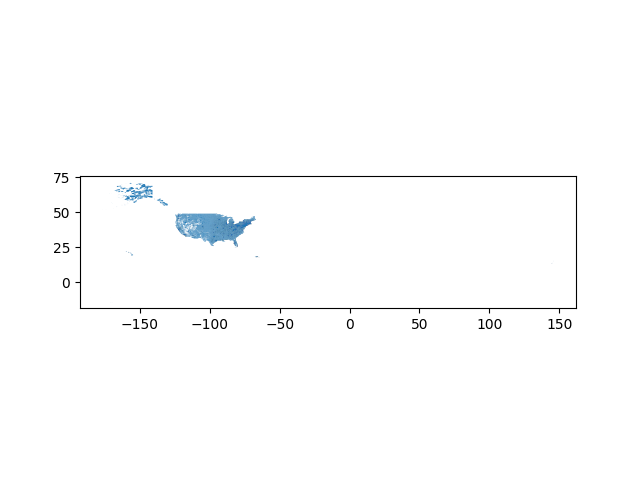

In [7]:
zipcode_gdf.plot();

In [8]:
states_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39...."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"(POLYGON ((-82.987477 24.625379, -82.987477 24..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.784381 46.63050399999999, -96.78..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458..."


<IPython.core.display.Javascript object>


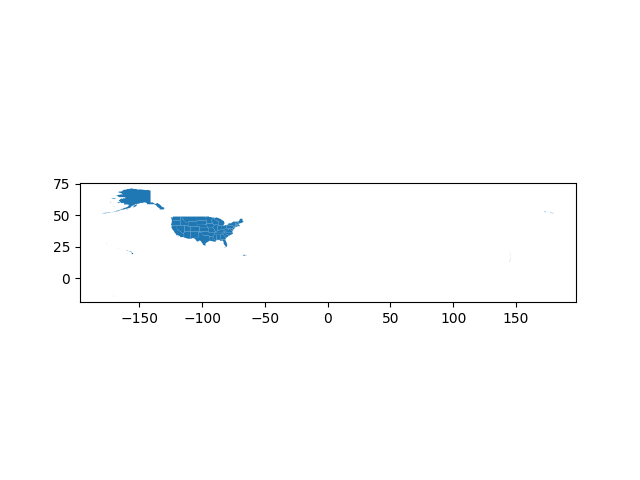

In [9]:
states_gdf.plot();

In [10]:
# First row as a Series
zipcode_gdf.iloc[0]

ZCTA5CE10                                                 43451
GEOID10                                                   43451
CLASSFP10                                                    B5
MTFCC10                                                   G6350
FUNCSTAT10                                                    S
ALAND10                                                63411475
AWATER10                                                 157689
INTPTLAT10                                          +41.3183010
INTPTLON10                                         -083.6174935
geometry      POLYGON ((-83.708733 41.327326, -83.708147 41....
Name: 0, dtype: object

In [11]:
# First row as a DataFrame
zipcode_gdf.iloc[[0], :]

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63411475,157689,+41.3183010,-083.6174935,"POLYGON ((-83.708733 41.327326, -83.708147 41...."


<IPython.core.display.Javascript object>


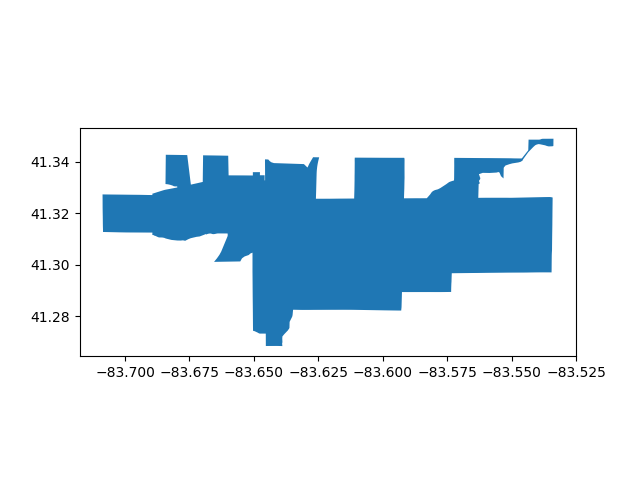

In [12]:
# Plot the first row of the dataframe
zipcode_gdf.iloc[[0], :].plot();

`df["column_name"] == "foo"` returns a [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) of booleans (e.g. `[False, False, True, False]`), so in order to filter a DataFrame and show only rows where `column_name` is `"foo"`, one common strategy is to select from the dataframe using that array of booleans, e.g.:

```python
df[df["column_name"] == "foo"]
```

This pattern takes a little while to get used to.

In [13]:
shiprock = zipcode_gdf[zipcode_gdf["GEOID10"] == "87420"]

<IPython.core.display.Javascript object>


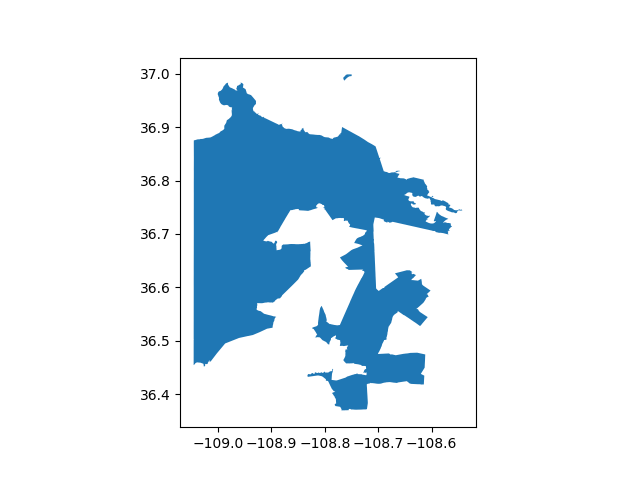

In [14]:
shiprock.plot();

Compare with: https://www.maptechnica.com/zip-code-map/87420

In [15]:
newmexico = states_gdf[states_gdf['NAME'] == "New Mexico"]

<IPython.core.display.Javascript object>


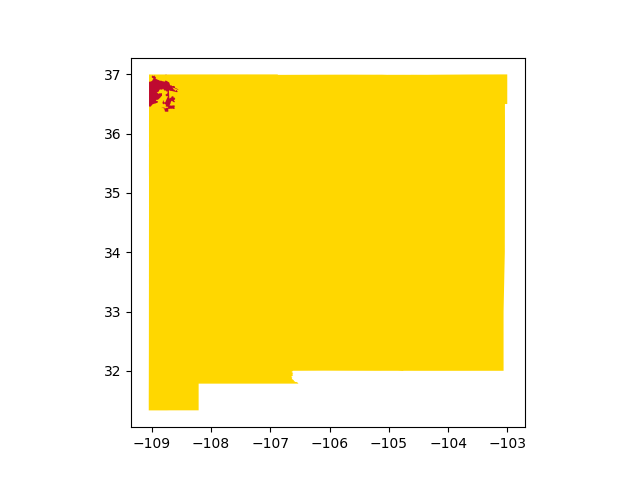

In [16]:
base = newmexico.plot(color='#FFD700')
shiprock.plot(ax=base, color='#BF0A30');